In [3]:
import pandas as pd
import plotly.express as px

In [4]:
df = pd.read_excel('Data/Anonymised SAP B2B Data.xlsx')

In [16]:
df['Betrag'] = df['Betrag'].map(lambda x: x.replace(',', '').replace('-', '') if isinstance(x, str) else x).astype(float)

In [17]:
df.to_parquet('Data/anonymized_sap_data.parquet')

In [35]:
for column in df.columns:
    print('*', column)

* Geschäftsfall ID
* NOVA Service ID
* Geschäftspartner
* Vertragskonto
* WebShop Benutzer Name
* Vorname des Käufers
* Nachname des Käufers
* NOVA Produktnummer
* NOVA Produktbezeichnung
* Reiseklasse
* Betrag
* Hinreisedatum
* Rückreisedatum
* Reise von
* Reise nach
* Vorname des Reisenden
* Nachname des Reisenden
* Personalnummer
* Reduktion


In [32]:
df.head()

,Geschäftsfall ID,NOVA Service ID,Geschäftspartner,Vertragskonto,WebShop Benutzer Name,Vorname des Käufers,Nachname des Käufers,NOVA Produktnummer,NOVA Produktbezeichnung,Reiseklasse,Betrag,Hinreisedatum,Rückreisedatum,Reise von,Reise nach,Vorname des Reisenden,Nachname des Reisenden,Personalnummer,Reduktion
0,5608edba-f8f1-435e-b7fe-8869470fe232,95475956874,2629103.0,1629104.0,AnnaBecker@musterfirma.ch,Anna,Becker,4092,City-Ticket,1,44.6,2025-03-20,2025-03-21,Lausanne,Genève,Anna,Becker,A4346,HTA123
1,c800e178-b5db-42c3-b3f2-ddcbf3751003,20174225059,10649430.0,9649431.0,MaxBecker@musterfirma.ch,Max,Becker,125,Billet de parcours,1,71.5,2025-03-19,2025-03-20,Genève,Luzern,Max,Becker,M3568,HTA123
2,79c376f0-fc6f-42a2-bde3-0f22cd74b991,28561004001,10248215.0,9248216.0,MoritzBecker@musterfirma.ch,Moritz,Becker,125,Streckenbillett,2,22.6,2025-03-11,2025-03-12,"Allschwil, Gartenhof",Zürich Flughafen,Moritz,Becker,M7827,HTA123
3,76364cdb-f7ba-43ca-8cda-8997df897fac,69029353348,10580582.0,9580583.0,LukasBecker@musterfirma.ch,Lukas,Becker,125,Streckenbillett,2,84.0,2025-02-21,2025-02-22,Basel SBB,Bern,Lukas,Becker,L5240,KEINE
4,24319aa7-0eee-45ce-b6ba-44da1b854417,86952637557,2934489.0,1934490.0,LukasFischer@musterfirma.ch,Lukas,Fischer,4092,City-Ticket,2,32.0,2025-02-14,2025-02-14,Winterthur,"St. Gallen, Uni/Dufourstrasse",Lukas,Fischer,L2899,HTA123


In [18]:
df.describe()

,NOVA Service ID,Geschäftspartner,Vertragskonto,NOVA Produktnummer,Reiseklasse,Betrag,Hinreisedatum,Rückreisedatum
count,6.676870e+05,6.675280e+05,6.675280e+05,6.676870e+05,667687.000000,665777.000000,658710,604229
mean,5.499207e+10,6.905266e+06,5.905267e+06,1.855863e+04,1.453600,64.076477,2025-02-20 10:18:07.689575424,2025-03-06 13:52:01.703195136
min,1.000010e+10,2.000363e+06,1.000364e+06,0.000000e+00,0.000000,-99999.000000,2024-01-01 00:00:00,2024-07-25 00:00:00
25%,3.246792e+10,4.578726e+06,3.578727e+06,1.250000e+02,1.000000,11.100000,2025-01-28 00:00:00,2025-01-30 00:00:00
50%,5.501894e+10,7.180939e+06,6.180940e+06,2.361000e+03,1.000000,28.500000,2025-02-20 00:00:00,2025-02-22 00:00:00
75%,7.744340e+10,9.413595e+06,8.413596e+06,1.244800e+04,2.000000,59.800000,2025-03-14 00:00:00,2025-03-18 00:00:00
max,9.999995e+10,1.099992e+07,9.999925e+06,1.000010e+06,2.000000,90000.000000,2025-12-05 00:00:00,2026-08-14 00:00:00
std,2.598631e+10,2.628131e+06,2.628131e+06,3.841027e+04,0.575613,548.676876,NaN,NaN


In [20]:
df['Reiseklasse'].value_counts(normalize=True)

Reiseklasse
2    0.495341
1    0.462918
0    0.041741
Name: proportion, dtype: float64

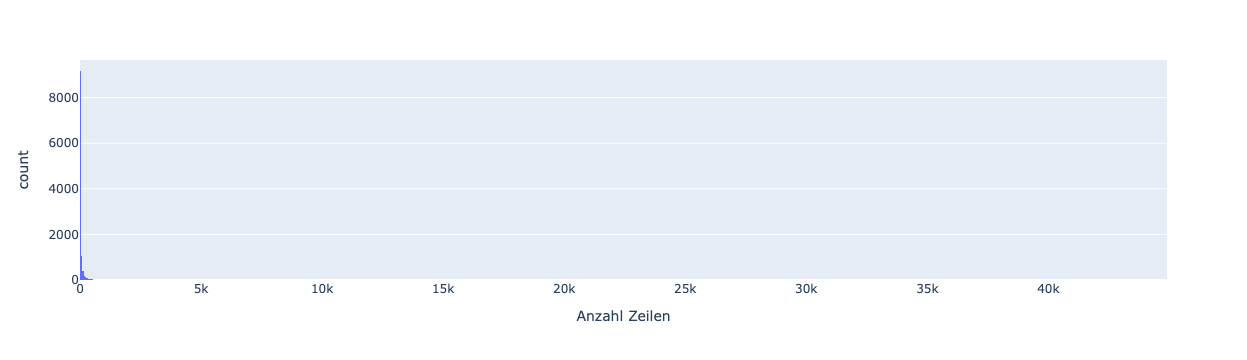

In [27]:
x= df.groupby('Vertragskonto').size().reset_index(name='Anzahl Zeilen')

px.histogram(x, x='Anzahl Zeilen')

In [30]:
x.sort_values('Anzahl Zeilen', ascending=False).head(20)

,Vertragskonto,Anzahl Zeilen
10327,9209577.0,44857
6597,6275091.0,9311
9342,8469347.0,8559
6693,6357998.0,7217
2996,3417714.0,7108
8717,7994317.0,6938
10373,9248216.0,6792
5793,5629769.0,5861
7670,7154385.0,4714
6165,5928778.0,4561


In [41]:
df.groupby('Geschäftsfall ID').size().sort_values(ascending=False)

Geschäftsfall ID
a78a36d5-7d75-4fed-95be-973bb1fb0aa8    56
8fb4809a-5e1c-42cc-9600-5283eb165e13    50
2f03281b-9554-40d9-ad25-3f17d754fa50    50
5b25ec4f-0928-4aa5-9ddc-0fda127d74e0    50
e86703d1-806c-423c-8901-c2b03f32f9ea    48
                                        ..
57c646ff-15b3-499b-98b9-9ff8328cb93a     1
57c65c85-ca5f-4c6e-aa0b-27797cc07022     1
57c67e5d-9ab9-44fc-abe3-16a9f594057c     1
57c6d218-424d-4070-92a4-104f965456b4     1
fffff321-e078-4275-af19-27ca29f44a9b     1
Length: 610481, dtype: int64

In [38]:
df.groupby('Geschäftspartner')['Vertragskonto'].unique().map(len).max()

np.int64(1)

In [39]:
df.groupby('Vertragskonto')['Geschäftspartner'].unique().map(len).max()

np.int64(1)

In [44]:
df[['Reise von', 'Reise nach']].drop_duplicates()

,Reise von,Reise nach
0,Lausanne,Genève
1,Genève,Luzern
2,"Allschwil, Gartenhof",Zürich Flughafen
3,Basel SBB,Bern
4,Winterthur,"St. Gallen, Uni/Dufourstrasse"
...,...,...
667672,St. Gallen,Kurzrickenbach Seepark
667675,Richterswil,"Glattfelden, Eichhölzli"
667679,Mellingen Heitersberg,"Bern, Neufeld P+R"
667682,"Ostermundigen, Sportplatzweg",Zürich Binz


In [54]:
df['Reise von']

0                             Lausanne
1                               Genève
2                 Allschwil, Gartenhof
3                            Basel SBB
4                           Winterthur
                      ...             
667682    Ostermundigen, Sportplatzweg
667683            St. Gallen St. Fiden
667684                        Sornetan
667685                        Montreux
667686                        Lausanne
Name: Reise von, Length: 667687, dtype: object

In [46]:
df['Reise nach'].unique()

array(['Genève', 'Luzern', 'Zürich Flughafen', ..., 'Baden, Kehl',
       'Boudevilliers, La Chotte', 'Steinmaur, Obersteinmaur'],
      shape=(11596,), dtype=object)

In [55]:
df.columns

Index(['Geschäftsfall ID', 'NOVA Service ID', 'Geschäftspartner',
       'Vertragskonto', 'WebShop Benutzer Name', 'Vorname des Käufers',
       'Nachname des Käufers', 'NOVA Produktnummer', 'NOVA Produktbezeichnung',
       'Reiseklasse', 'Betrag', 'Hinreisedatum', 'Rückreisedatum', 'Reise von',
       'Reise nach', 'Vorname des Reisenden', 'Nachname des Reisenden',
       'Personalnummer', 'Reduktion'],
      dtype='object')

In [62]:
df['Hinjahr'] = df['Hinreisedatum'].dt.year
df['Rückjahr'] = df['Rückreisedatum'].dt.year

df

,Geschäftsfall ID,NOVA Service ID,Geschäftspartner,Vertragskonto,WebShop Benutzer Name,Vorname des Käufers,Nachname des Käufers,NOVA Produktnummer,NOVA Produktbezeichnung,Reiseklasse,...,Hinreisedatum,Rückreisedatum,Reise von,Reise nach,Vorname des Reisenden,Nachname des Reisenden,Personalnummer,Reduktion,Hinjahr,Rückjahr
0,5608edba-f8f1-435e-b7fe-8869470fe232,95475956874,2629103.0,1629104.0,AnnaBecker@musterfirma.ch,Anna,Becker,4092,City-Ticket,1,...,2025-03-20,2025-03-21,Lausanne,Genève,Anna,Becker,A4346,HTA123,2025.0,2025.0
1,c800e178-b5db-42c3-b3f2-ddcbf3751003,20174225059,10649430.0,9649431.0,MaxBecker@musterfirma.ch,Max,Becker,125,Billet de parcours,1,...,2025-03-19,2025-03-20,Genève,Luzern,Max,Becker,M3568,HTA123,2025.0,2025.0
2,79c376f0-fc6f-42a2-bde3-0f22cd74b991,28561004001,10248215.0,9248216.0,MoritzBecker@musterfirma.ch,Moritz,Becker,125,Streckenbillett,2,...,2025-03-11,2025-03-12,"Allschwil, Gartenhof",Zürich Flughafen,Moritz,Becker,M7827,HTA123,2025.0,2025.0
3,76364cdb-f7ba-43ca-8cda-8997df897fac,69029353348,10580582.0,9580583.0,LukasBecker@musterfirma.ch,Lukas,Becker,125,Streckenbillett,2,...,2025-02-21,2025-02-22,Basel SBB,Bern,Lukas,Becker,L5240,KEINE,2025.0,2025.0
4,24319aa7-0eee-45ce-b6ba-44da1b854417,86952637557,2934489.0,1934490.0,LukasFischer@musterfirma.ch,Lukas,Fischer,4092,City-Ticket,2,...,2025-02-14,2025-02-14,Winterthur,"St. Gallen, Uni/Dufourstrasse",Lukas,Fischer,L2899,HTA123,2025.0,2025.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
667682,e796da77-fc64-4852-9a75-34d0bbfa32a1,53456123803,10209576.0,9209577.0,HansMustermann@musterfirma.ch,Hans,Mustermann,125,Streckenbillett,1,...,2025-03-25,2025-03-26,"Ostermundigen, Sportplatzweg",Zürich Binz,Hans,Mustermann,H9970,HTA123,2025.0,2025.0
667683,6309fa1f-f118-4156-b4aa-f8b18461f7df,95056648924,3425453.0,2425454.0,AnnaMeier@musterfirma.ch,Anna,Meier,12444,OSTWIND Individual Ticket,2,...,2025-02-20,2025-02-20,St. Gallen St. Fiden,Salez-Sennwald,Anna,Meier,A3011,HTA123,2025.0,2025.0
667684,27378f03-959d-4092-92b9-47b566484c81,81069283581,2321479.0,1321480.0,MoritzSchmidt@musterfirma.ch,Moritz,Schmidt,10979,Libero Carte journalière,2,...,2025-03-05,2025-03-05,Sornetan,"Moutier, gare",Moritz,Schmidt,M2986,KEINE,2025.0,2025.0
667685,6951e631-2958-4399-a0f6-67f8a342c0c2,64723942267,5630174.0,4630175.0,SophieWagner@musterfirma.ch,Sophie,Wagner,2007,Mobilis Billet individuel,1,...,2025-01-24,2025-01-24,Montreux,"Denges, Pierraz-Mur",Sophie,Wagner,S6503,HTA123,2025.0,2025.0


Rückreisedatum
2025.0    581244
2026.0     22906
2024.0        79
Name: count, dtype: int64